In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("../../csv_files/engagement_reddit.csv")

TEXT_COL = "text_clean"
LABEL_COL = "high_engagement"   # already in your CSV



df_model = df[[TEXT_COL, LABEL_COL]].dropna().copy()


X_train_df, X_test_df = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model[LABEL_COL]
)

y_train = X_train_df[LABEL_COL].values
y_test  = X_test_df[LABEL_COL].values


tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1,2),
    min_df=2
)

X_train = tfidf.fit_transform(X_train_df[TEXT_COL])
X_test  = tfidf.transform(X_test_df[TEXT_COL])



svm = LinearSVC(
    C=1,
    class_weight="balanced",
    max_iter=5000,
    random_state=42
)

svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1073
           1       0.81      0.78      0.80       368

    accuracy                           0.90      1441
   macro avg       0.87      0.86      0.86      1441
weighted avg       0.90      0.90      0.90      1441

Confusion Matrix:
[[1005   68]
 [  80  288]]


In [3]:
print(df[LABEL_COL].value_counts(normalize=True))


high_engagement
0    0.744897
1    0.255103
Name: proportion, dtype: float64


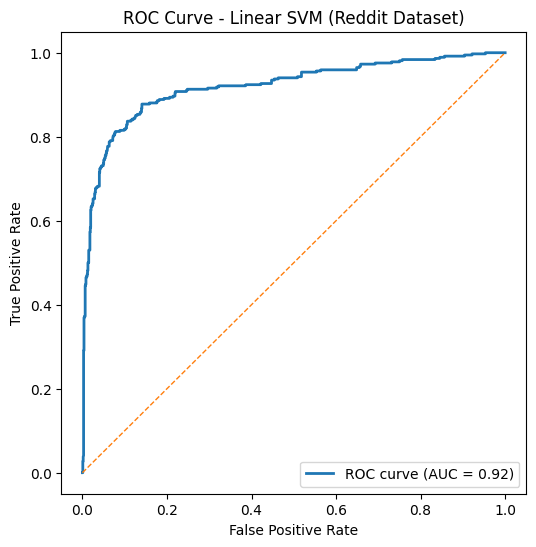

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# Get decision scores (NOT probabilities)
y_scores = svm.decision_function(X_test)

# ROC curve + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear SVM (Reddit Dataset)')
plt.legend(loc='lower right')
plt.show()